# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
import os
os.getcwd()

'C:\\Users\\kings\\Desktop\\cohort-analysis\\notebooks'

# Load Data

In [6]:
data = pd.read_csv("C:/Users/kings/Desktop/cohort-analysis/data/Dataset_ecommerce.csv")
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali


In [7]:
data['Quantity'].max()

100

In [8]:
data['UnitPrice'].max()

100.0

# Clean Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
#Descriptive Statistics
data.describe(include = "all")
data.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali


In [29]:
# Check for Missing values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [44]:
# Drop missing values
data.dropna(inplace = True)

In [46]:
# Check for Info on daqtaframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [54]:
# Convert InvoiceDate to Datetime format
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Exploratory Data Analysis

## Analysis by country

In [64]:
quantity_by_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_by_country = quantity_by_country.sort_values("Quantity", ascending = False).reset_index()

In [66]:
quantity_by_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


In [ ]:
#visualise top 10 countries by sales

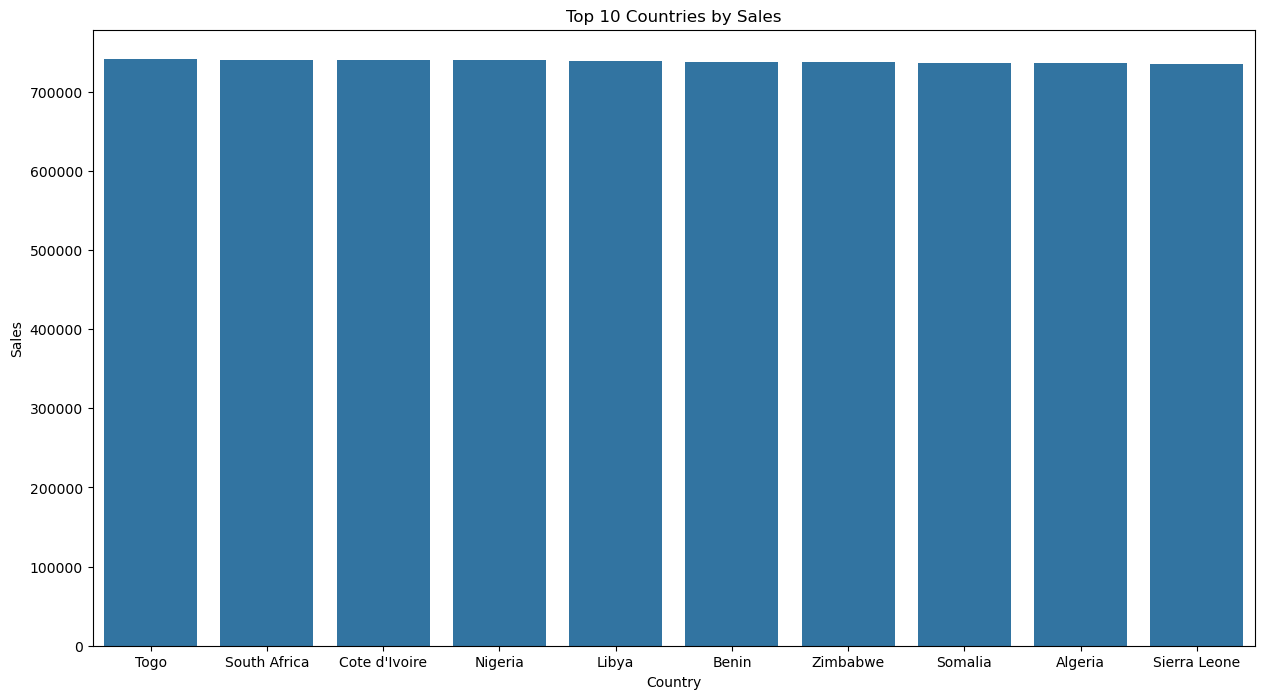

In [90]:
top_10_countries = quantity_by_country.head(10)

plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = top_10_countries)

plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Top 10 Countries by Sales")
plt.show()

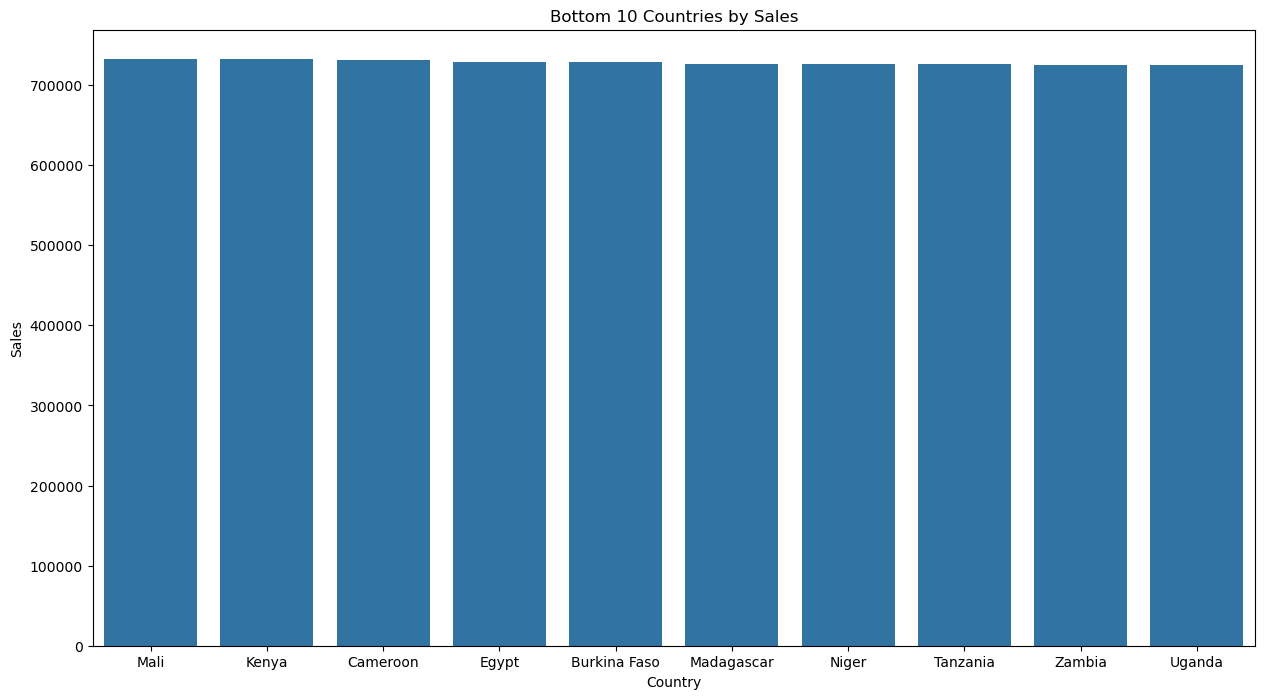

In [92]:
bottom_10_countries = quantity_by_country.tail(10)

plt.figure(figsize = (15,8))
ax = sns.barplot(x = "Country", y = "Quantity", data = bottom_10_countries)

plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Bottom 10 Countries by Sales")
plt.show()

*Analysis of Countries by Customers*

In [145]:
countries_by_customer = data.groupby("Country")["CustomerID"].nunique().reset_index()
countries_by_customer = countries_by_customer.sort_values("CustomerID", ascending = False).reset_index()

In [155]:
countries_by_customer.head(3)

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


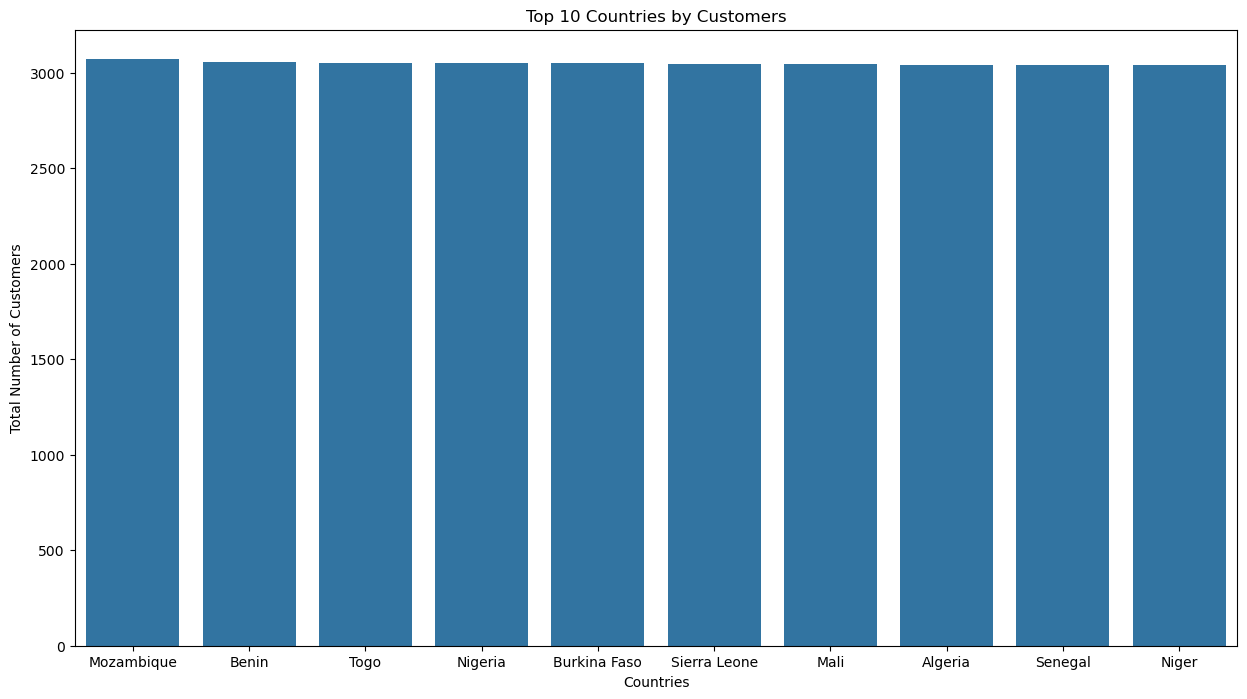

In [157]:
#Draw a plot of top 10 countries with most number of customers
top_10_countries_by_customers = countries_by_customer.head(10)

plt.figure(figsize = (15,8))
sns.barplot(x = "Country", y = "CustomerID", data = top_10_countries_by_customers)

plt.xlabel("Countries")
plt.ylabel("Total Number of Customers")
plt.title("Top 10 Countries by Customers")
plt.show()

## Sales trend Visualisation

In [242]:
data['Month'] = data['InvoiceDate'].dt.to_period('M')

data['Sales'] = data['Quantity'] * data['UnitPrice']

monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

In [244]:
monthly_sales.head(5)

,Month,Sales
0,2010-12-01,67923671.84
1,2011-01-01,55829330.62
2,2011-02-01,52085357.17
3,2011-03-01,71372098.54
4,2011-04-01,59140029.32


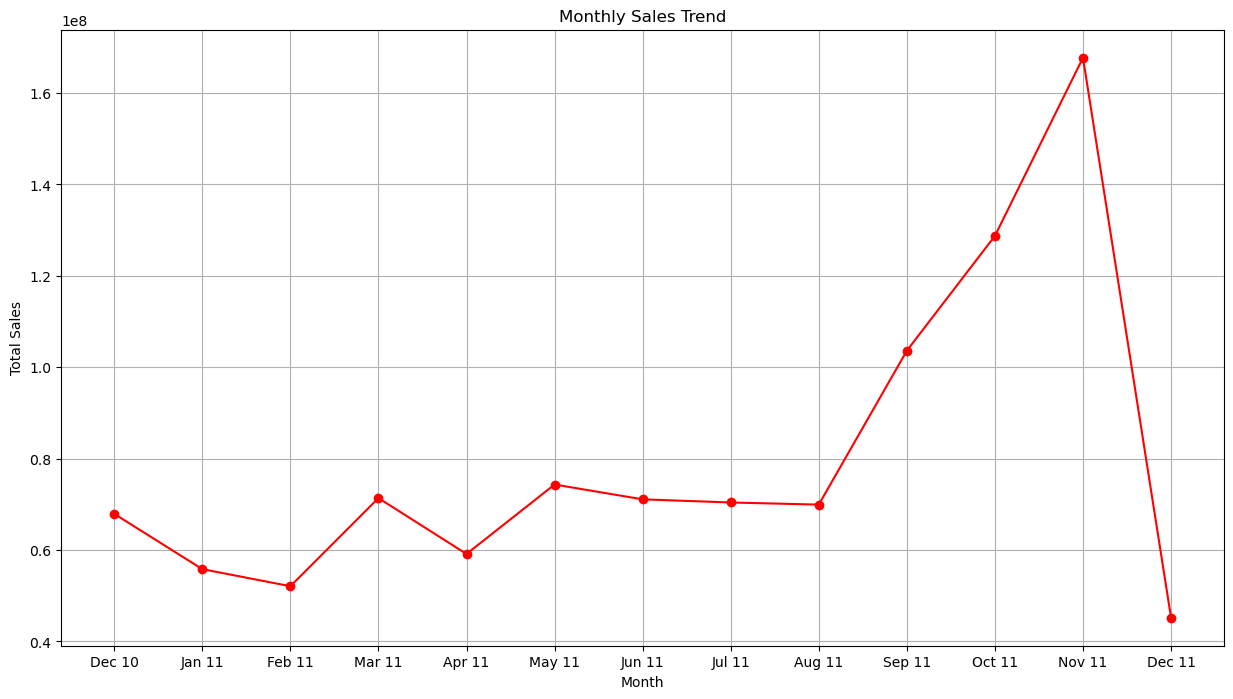

In [254]:
#Line Plot

plt.figure(figsize = (15,8))
plt.plot(
    monthly_sales['Month'].dt.strftime('%b %y'), 
    monthly_sales['Sales'],                      
    marker='o',                                  
    linestyle='-',                              
    color='red'                                 
)

plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend")

plt.grid(True)